# Read CSV data frames and do 2D plots

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits import mplot3d
import cv2

In [2]:
path=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame\CSV'

## Create two functions. coolect_as_df will create a list of dataframes. collect_as_array will create a 3D array

In [3]:
def collect_as_df(path):
    
    dfs=[]
    os.chdir(path)
    for f in os.listdir(path):
        df=pd.read_csv(f)
        # try to del unkown 1st column
        try:
            del df['Unnamed: 0']
        except:
            pass
        dfs.append(df)
    print('Completed')
    print('{} Sets of Data Imported'.format(len(dfs)))
    return dfs

In [4]:
def collect_as_array(path):
    os.chdir(path)
    
    #read 1st file and initial array
    f=os.listdir(path)[0]
    df=pd.read_csv(f)
    #delete 1st column, which is unknown
    del df['Unnamed: 0']
    arr=np.array(df)
    
    for f in os.listdir(path)[1:]:
               
        df=pd.read_csv(f)
        try:
            del df['Unnamed: 0']
        except:
            pass
        arr_temp=np.array(df)
        
        #stack the array along depth, which is axis0
        arr=np.dstack((arr,arr_temp))
    print('Import Completed')
    return arr
        
        

## Create a list of dataframes and overview one of them

In [ ]:
dfs=collect_as_df(path)
dfs[0].describe()

In [ ]:
dfs[0].head(5)

In [ ]:
dfs[0]['Q'].dtype

In [ ]:
wbs=dfs[0]['Write_Bias'].unique()
rbs=dfs[0]['Read_Bias'].unique()
wbs

## Create a 3D array, each DataFrame is along axis=2 

In [5]:
arr=collect_as_array(path)
arr.shape

Import Completed


(72, 11, 901)

## Create Folders to Save Ramp Plots

In [ ]:
parent_dir=os.path.dirname(os.getcwd())
sub_folder='Ramp Plots'

new_dir=os.path.join(parent_dir,sub_folder)
print(new_dir)

try:
    os.makedirs(new_dir)
except OSError as error: 
    print(error)   

i=0
for f in os.listdir(path):
    i+=1
    new_folder=os.path.join(new_dir,str(i))
    os.makedirs(new_folder)

## Plots for Each Ramp

### Plot ButterFly Curve. A0 versus Write Voltage at different read bias
### Note A0 changes with Bias

In [ ]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)


    
f,ax=plt.subplots(l,figsize=(5,5*l))
f.dpi=100

# user choose the ramp for plot, it can be put into a for loop to output all data
k=0
for i,value in enumerate(read_bias):

    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].plot(temp[:,0],temp[:,2],label='Read Bias:{}V'.format(value))
    ax[i].legend()
    ax[i].set_xlabel('Write_Bias (V)')
    ax[i].set_ylabel('Amplitude')
    ax[i].set_title('A0 - Read Bias')
    
#     plt.savefig('A0 vs Write Bias.png')
    
    
    
    
    

### Plot Single Freq Amplitude Versus Write Bias

In [ ]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)

# f,ax=plt.subplots(1,figsize=(5,5*l))
f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
k=0
for i,value in enumerate(read_bias):

    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].plot(temp[:,0],temp[:,7],label='Read Bias:{}V'.format(value))
    ax[i].legend()
    ax[i].set_xlabel('Write_Bias (V)')
    ax[i].set_ylabel('Amplitude')
#     ax[i].set_title('Single Freq Amp - Read Bias')
    
#     plt.savefig('A0 vs Write Bias.png')
    

### Plot Hysteresis Loop (PR loop), A0*sign(InPhase) versus Write Bias

In [ ]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)

# f,ax=plt.subplots(l,figsize=(5,5*l))
f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
k=0
for i,value in enumerate(read_bias):

    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    ax[i].plot(temp[:,0],temp[:,6],label='Read Bias:{}V'.format(value))
    ax[i].legend(loc='upper left')
    ax[i].set_xlabel('Write_Bias (V)')
    ax[i].set_ylabel('Amplitude')
#     ax[i].set_title('Hysteresis Loop - Read Bias')
    
#     plt.savefig('A0 vs Write Bias.png')

### Plot f0, A0 versus Write Bias

In [ ]:
read_bias=np.unique(arr[:,1,0])
l=len(read_bias)

'''Each Amp_Arr and Freq_Arr is string type, need to conver them into float list firstly'''

# Convert freq arr string into freq arr float
freq=arr[0,-1,0]
freq=freq.replace('[','')
freq=freq.replace(']','')
freq=[float(freq) for freq in freq.split()]

# f,ax=plt.subplots(1,1,figsize=(5,5*l))
f,ax=plt.subplots(2,2,figsize=(10,10))
f.dpi=100
ax=ax.ravel()
# user choose the ramp for plot, it can be put into a for loop to output all data
k=0

for i,value in enumerate(read_bias):
  
    slice=arr[:,:,k]
    filt=slice[:,1]==value
    temp=slice[filt]
    
    amp_arr=[]
    
    for m in range(temp.shape[0]):
        y=temp[m,-2]
        y=y.replace('[','')
        y=y.replace(']','')
        y=[float(y) for y in y.split()]
        for n in y:
            amp_arr.append(n)
    
    # Frequency is the same for each write bias
    # y is the indexes of write biases
    # temp.shape[0] is the length of write bias list  
    x=freq
    y=np.arange(temp.shape[0])

    X,Y=np.meshgrid(x,y)
    Z=np.array(amp_arr).reshape(temp.shape[0],len(freq))

    ax[i].contourf(X,Y,Z)
    ax[i].set_title('f0 at read bias = {}V'.format(value))
    
#     plt.savefig('A0 vs Write Bias.png')

In [ ]:
a=[1,2,3]
a.append([4,5,6])
a

In [ ]:
x=arr[0,-1,0]
x=x.replace('[','')
x=x.replace(']','')
x=[float(x) for x in x.split()]
x

# Plot 2D Maps of Interests

In [ ]:
# Identify the unique read bias
np.unique(arr[:,1,0])

## Mask the array and plot 2D images for each read bias

In [ ]:
'''It looks like the elements in this array is changed to string somehow!!
    need to convert it into float before using
'''
test_arr=arr[0,3,0:900]
test_arr=np.array([float(x) for x in test_arr]).reshape(30,30)
# test_arr=np.array(test_arr).reshape(30,30)
print(test_arr)
plt.imshow(test_arr)

## Plot Resonance Frequency 2D Map

In [ ]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.6, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)
        
        # User chose which data type to be plotted
        im=axs[i].imshow(f0,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Resonance Frequency\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)
        im.set_clim(300000,400000)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='f0'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('f0 Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




## Plot Single Frequency Amplitude

In [ ]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.5, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        im=axs[i].imshow(asf,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Single Freq Amp\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(0,20)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='Single Freq Amp'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('Single Freq Amp Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




## Plot Single Freq Phase

In [ ]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

rbs=np.unique(arr[:,1,0])

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    '''The subplot dimention is manually determined here. need to change later'''
    fig,axs=plt.subplots(3,6,figsize=(20,10))
    fig.subplots_adjust(hspace = 0.5, wspace=0.4)

    #axs is a 2D numpy array, need to flat it. So call axs.flatten() or axs.ravel()
    axs = axs.ravel()
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]

        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        im=axs[i].imshow(psf,cmap=plt.get_cmap('plasma'))
        axs[i].set_title('Single Freq Phase\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        clb=fig.colorbar(im, ax=axs[i],fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(-90,90)

    # Go to the upper level and create a folder
    parent_dir=os.path.dirname(os.getcwd())
    print(parent_dir)
    folder='Single Freq Phase'
    new_path=os.path.join(parent_dir,folder)
    try:
        os.mkdir(new_path)
    except OSError as error: 
        print(error)  
    # save the image in that folder
    os.chdir(new_path)
    plt.savefig('Single Freq Phase Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
    plt.show()




In [ ]:
%matplotlib inline
# %matplotlib notebook

rb=arr[0,-1,0]

fig=plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

x = np.arange(0, 30)
X,Y=np.meshgrid(x,x)

# Get Single Frequency Phase 

Z1=np.array([float(x) for x in arr[0,8,:900]]).reshape(30,30)
Z2=np.array([float(x) for x in arr[1,8,:900]]).reshape(30,30)
Z3=np.array([float(x) for x in arr[2,8,:900]]).reshape(30,30)
Z4=np.array([float(x) for x in arr[3,8,:900]]).reshape(30,30)
Z5=np.array([float(x) for x in arr[4,8,:900]]).reshape(30,30)

# ax.plot_surface(X,Y,Z1)
ax.contourf(X, Y, Z1, zdir='z',offset=0,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z2, zdir='z',offset=22.5,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z3, zdir='z',offset=45,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z4, zdir='z',offset=67.5,cmap=plt.get_cmap('rainbow'))
ax.contourf(X, Y, Z5, zdir='z',offset=90,cmap=plt.get_cmap('rainbow'))

ax.set_zlim(0,90)
plt.title('Single Frequency Phase')
# plt.savefig('Single Freq Phase Slice Map Read Bias {:.1f}.tiff'.format(rb),bbox_inches='tight',dpi=200)
plt.show()

## Create A Video out of pictures
## Output the pictures needed first

In [ ]:
%matplotlib inline

# Mask the array and resize it
# loop each unique read bias to mask the array

# Go to the upper level and create a folder
parent_dir=os.path.dirname(os.getcwd())
print(parent_dir)
folder='Single Freq Phase Video'
new_path=os.path.join(parent_dir,folder)
try:
    os.mkdir(new_path)
except OSError as error: 
    print(error)  
# save the image in that folder
os.chdir(new_path)


rbs=np.unique(arr[:,1,0])

k=0

for rb in rbs:
    
    filt=arr[:,1,0]==rb
    arr_filt=arr[filt][:,:,0:900]
    
    # loop each write bias and put them into subplot
    for i in range(arr_filt.shape[0]):   
        # get write bias and read bias
        wb=arr_filt[i,0,0]
        rb=arr_filt[i,1,0]
        k+=1
        s=str(k).zfill(2)
        # for each write bias, get the array of each data type
        a0=np.array([float(x) for x in arr_filt[i,2,:]]).reshape(30,30)
        f0=np.array([float(x) for x in arr_filt[i,3,:]]).reshape(30,30)
        Q=np.array([float(x) for x in arr_filt[i,4,:]]).reshape(30,30)
        a0_sign=np.array([float(x) for x in arr_filt[i,5,:]]).reshape(30,30)
        asf=np.array([float(x) for x in arr_filt[i,7,:]]).reshape(30,30)
        psf=np.array([float(x) for x in arr_filt[i,8,:]]).reshape(30,30)

        # User chose which data type to be plotted
        
        fig=plt.figure()
        im=plt.imshow(psf,cmap=plt.get_cmap('plasma'))
        plt.title('Single Freq Phase\n Write Bias: {:.1f}V\n Read Bias: {:.1f}V'.format(wb,rb))
        plt.colorbar(im,fraction=0.046, pad=0.04)
#         clb.set_ticks([270,310])
#         clb.ax.tick_params(direction='in',labelsize=8)

        '''The subplot dimention is manually determined here. need to change later'''
        im.set_clim(-90,90)


        plt.savefig('{} Write Bias {:.1f} Read Bias {:.1f}.tiff'.format(s,wb,rb),bbox_inches='tight',dpi=200)
        plt.show()

## Create a move out of pictures

In [ ]:
def convert_pic_to_video(pathIn,pathOut,fps,time):
    
    os.chdir(pathIn)
    files=[f for f in os.listdir(pathIn)]    
    frame_array=[]
    
    for f in files:
        img=cv2.imread(f)
        height,width,layers=img.shape
        size=(width,height)
#         print(f)
        for k in range(time):
            frame_array.append(img)
        
    out=cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'mp4v'),fps,size)
    
    for i in range(len(frame_array)):
        out.write(frame_array[i])
        
    out.release()

In [ ]:
pathIn=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\2D Map on PZT\Data2\DataFrame\Single Freq Phase Video'
pathOut=os.path.join(pathIn,'video.avi')
fps=1
time=1
convert_pic_to_video(pathIn,pathOut,fps,time)

## Create Recess Mapping of Phase and Amplitude

In [ ]:
dfs[0].head(5)

In [ ]:
arr[4,:9,0]

In [71]:
# assign positive and negative arrays of single frequency phase
arr_pos=arr[4,8,0:900].reshape(30,30)
arr_pos=arr_pos.astype('float')

arr_neg=arr[13,8,0:900].reshape(30,30)
arr_neg=arr_neg.astype('float')

# Merge them together into a recess pattern
arr_mix=np.zeros((30,30))
arr_mix[::2,::2]=arr_pos[::2,::2]
arr_mix[::2,1::2]=arr_neg[::2,1::2]
arr_mix[1::2,::2]=arr_neg[1::2,::2]
arr_mix[1::2,1::2]=arr_pos[1::2,1::2]

arr_mix

array([[  35.99981546, -117.57274389,   67.07095385, -108.30225706,
          74.38677549, -107.78735876,   72.29306459, -104.69796896,
          71.4506793 , -108.62365007,   71.48565531,  -97.32850313,
          68.19520712, -113.10478449,   69.58424807, -107.40880251,
          74.62542772, -106.56787634,   70.69360971, -104.07024622,
          70.07374048, -109.83180285,   78.35738897, -104.16732073,
          74.26172018, -108.13793421,   68.38922739, -102.42242575,
          71.42621756, -110.0056529 ],
       [-108.45576525,   70.3106761 , -105.98130941,   76.27676725,
        -105.32732248,   73.52216005, -102.03339815,   78.40807199,
        -110.28893709,   73.55451822, -102.81235456,   69.96370554,
        -100.93545198,   73.02743196, -103.56058359,   78.86439085,
        -100.42488813,   76.73394442, -101.43635988,   71.16044283,
        -100.59534788,   78.186028  , -101.71955824,   74.12100077,
        -102.67069101,   78.45532179, -106.43767118,   77.42543936,
        -

Text(0.5,1,'Phase Recess Map')

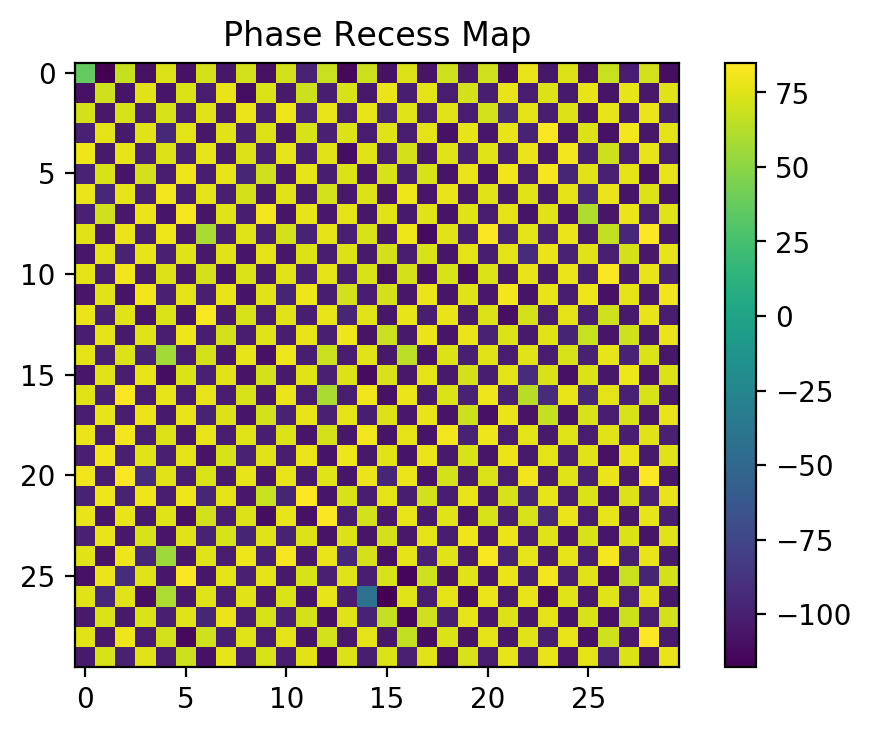

In [72]:
# Single Frequency Phase Recess Map
plt.figure(dpi=200)
plt.imshow(arr_mix)
plt.colorbar()
plt.title('Phase Recess Map')

In [69]:
# assign positive and negative arrays of A0*sign
arr_pos=arr[4,6,0:900].reshape(30,30)
arr_pos=arr_pos.astype('float')

arr_neg=arr[13,6,0:900].reshape(30,30)
arr_neg=arr_neg.astype('float')

# Merge them together into a recess pattern
arr_mix=np.zeros((30,30))
arr_mix[::2,::2]=arr_pos[::2,::2]
arr_mix[::2,1::2]=arr_neg[::2,1::2]
arr_mix[1::2,::2]=arr_neg[1::2,::2]
arr_mix[1::2,1::2]=arr_pos[1::2,1::2]

arr_mix

array([[  54.42829619,  -50.11309557,   70.56854927,  -60.26319498,
          60.39130976,  -67.62841783,   53.05916556,  -68.99090962,
          67.00815678,  -64.70327335,   67.41600887,  -69.17968772,
          68.00150577,  -61.73448782,   64.84517567,  -63.72725751,
          83.8053239 ,  -70.75946788,   65.88841327,  -65.46229141,
          67.72205571,  -67.01154065,   52.6500767 ,  -79.02672732,
          59.82288974,  -56.50150648,   66.49946277,  -67.75241592,
          52.82353531,  -61.22676749],
       [ -49.77314619,   68.61260252,  -55.06154899,   46.99123981,
         -71.18530449,   62.24108285,  -75.79313216,   55.0165562 ,
         -73.12201907,   61.75319415,  -57.27262314,   57.69694143,
         -67.51913846,   66.68886966,  -59.86042694,   75.53777674,
         -73.24589616,   71.57469729,  -67.88355703,   71.32804449,
         -78.89276922,   68.23167219,  -78.00139485,   68.48855942,
         -76.69063126,   61.20187908,  -74.5188625 ,   71.50278175,
         

Text(0.5,1,'A0*sign Recess Map')

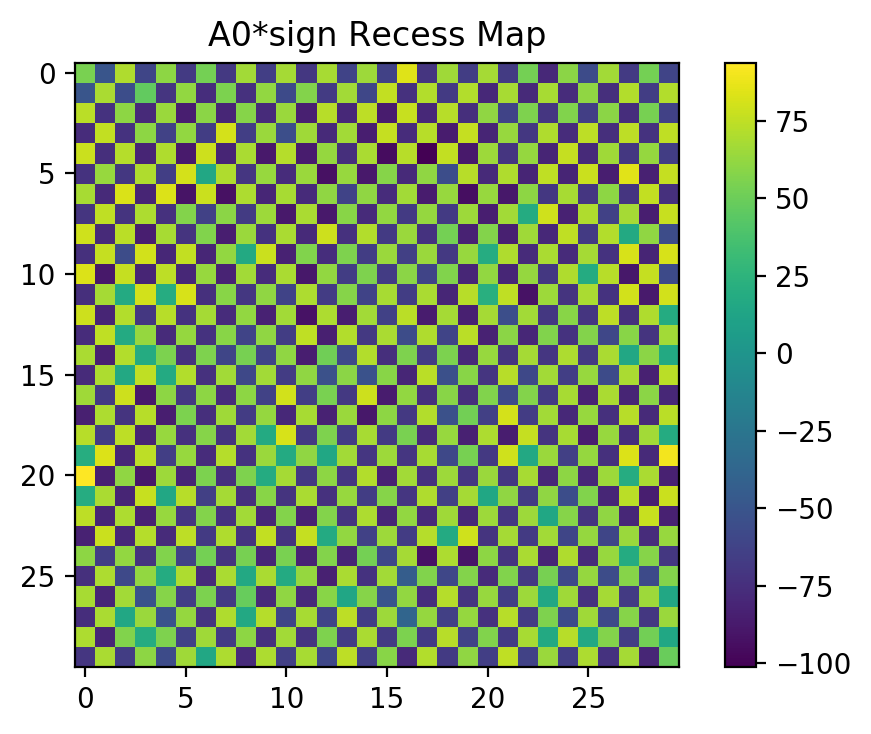

In [70]:
# Single Frequency Phase Recess Map
plt.figure(dpi=200)
plt.imshow(arr_mix)
plt.colorbar()
plt.title('A0*sign Recess Map')

In [13]:
## Create a Bruker Logo pattern
from PIL import Image

img_path=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\Scripts\My Scripts\bruker-logo-vector.png'
img = Image.open(img_path)
img.show()
# use resize function can convert the image to any size
img2 = img.resize((30, 30))

# convert it into array
img2=np.asarray(img2)
# print(type(img2))
# img2

mask=img2==15
# print(mask)


# assign positive and negative arrays of single frequency phase
arr_pos=arr[4,8,0:900].reshape(30,30)
arr_pos=arr_pos.astype('float')

arr_neg=arr[13,8,0:900].reshape(30,30)
arr_neg=arr_neg.astype('float')

# Merge them together into a recess pattern
arr_mix=np.zeros((30,30))
arr_mix=arr_pos
arr_mix[mask]=arr_neg[mask]

arr_mix

array([[-122.8168273 , -117.57274389, -105.78806162, -108.30225706,
        -106.85116053, -107.78735876, -106.22691393, -104.69796896,
        -102.28166342, -108.62365007, -104.09213305,  -97.32850313,
        -105.72686434, -113.10478449, -104.10522223, -107.40880251,
        -104.48377848, -106.56787634, -104.60093737, -104.07024622,
        -106.80391073, -109.83180285, -105.88685274, -104.16732073,
        -102.74150133, -108.13793421, -106.54255629, -102.42242575,
        -104.25907373, -110.0056529 ],
       [-108.45576525, -105.94109774, -105.98130941, -105.88071585,
        -105.32732248, -104.96812105,   75.5354476 ,   78.40807199,
          73.7617135 ,   73.55451822,   77.37471342, -108.73638868,
        -100.93545198, -104.52227354, -103.56058359, -102.49323606,
        -100.42488813, -102.37436056, -101.43635988, -103.96888018,
        -100.59534788,   78.186028  ,   72.69084692,   74.12100077,
        -102.67069101, -104.31503534, -106.43767118, -102.39710569,
        -

Text(0.5,1,'PZT Phase Map - Bruker Logo')

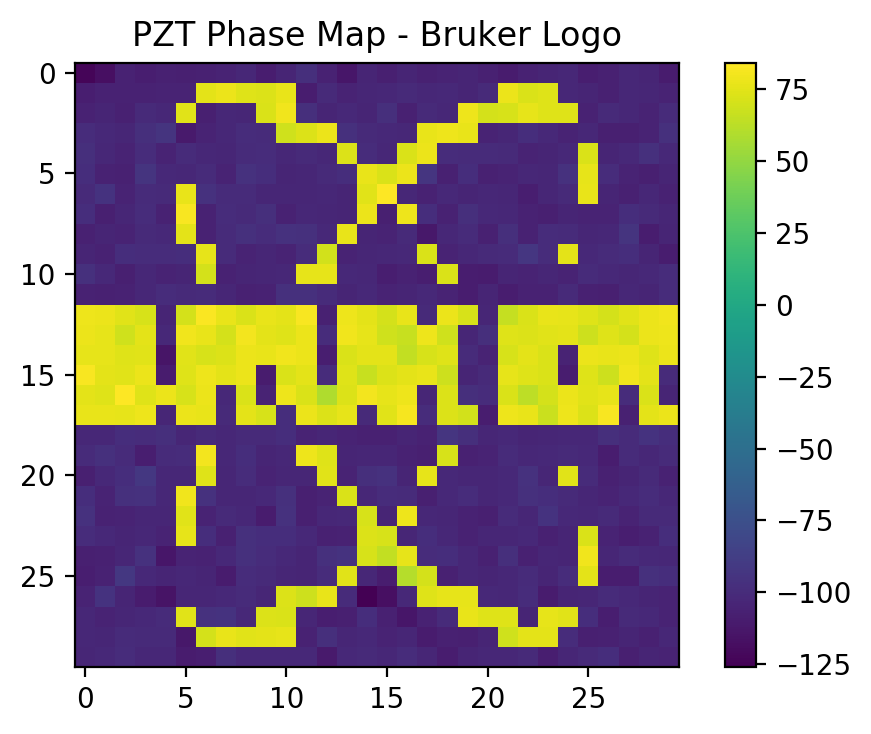

In [14]:
# Single Frequency Phase Recess Map
plt.figure(dpi=200)
plt.imshow(arr_mix)
plt.colorbar()
plt.title('PZT Phase Map - Bruker Logo')

## print a baby face on phase map of PZT

(30, 30)


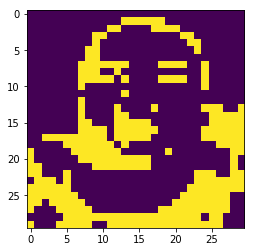

array([[  35.99981546,   42.29305029,   67.07095385,   71.03633165,
          74.38677549,   71.09315157,   72.29306459,   74.06679869,
          71.4506793 ,   75.57561636,   71.48565531,   74.83266592,
          68.19520712,   67.401402  ,   69.58424807,   72.24499941,
          74.62542772,   71.59629107,   70.69360971,   71.39385939,
          70.07374048,   77.48140097,   78.35738897,   72.77478933,
          74.26172018,   65.11186838,   68.38922739,   77.19725847,
          71.42621756,   64.24905539],
       [  73.4146142 ,   70.3106761 ,   71.23648882,   76.27676725,
          73.0842948 ,   73.52216005,   75.5354476 ,   78.40807199,
          73.7617135 ,   73.55451822,   77.37471342,   69.96370554,
          72.66720057, -104.52227354, -103.56058359, -102.49323606,
        -100.42488813, -102.37436056, -101.43635988,   71.16044283,
          77.5732398 ,   78.186028  ,   72.69084692,   74.12100077,
          69.93662596,   78.45532179,   75.2504468 ,   77.42543936,
         

In [67]:
## Create a Bruker Logo pattern
from PIL import Image,ImageOps
import cv2
img_path=r'C:\Users\Xiaomin.Chen\Desktop\AFMi-Test\Projects\SS-PFM\Scripts\My Scripts\baby face.jpg'

img = Image.open(img_path)
gray_img= ImageOps.grayscale(img)

# use resize function can convert the image to any size
img2 = gray_img.resize((30, 30))
# convert it into array
img2=np.asarray(img2)

print(img2.shape)

mask=img2<130

plt.imshow(mask)
plt.show()
# assign positive and negative arrays of single frequency phase
arr_pos=arr[4,8,0:900].reshape(30,30)
arr_pos=arr_pos.astype('float')

arr_neg=arr[13,8,0:900].reshape(30,30)
arr_neg=arr_neg.astype('float')

# Merge them together into a recess pattern
arr_mix=np.zeros((30,30))
arr_mix=arr_pos
arr_mix[mask]=arr_neg[mask]

arr_mix

Text(0.5,1,'PZT Phase Map - Baby Face')

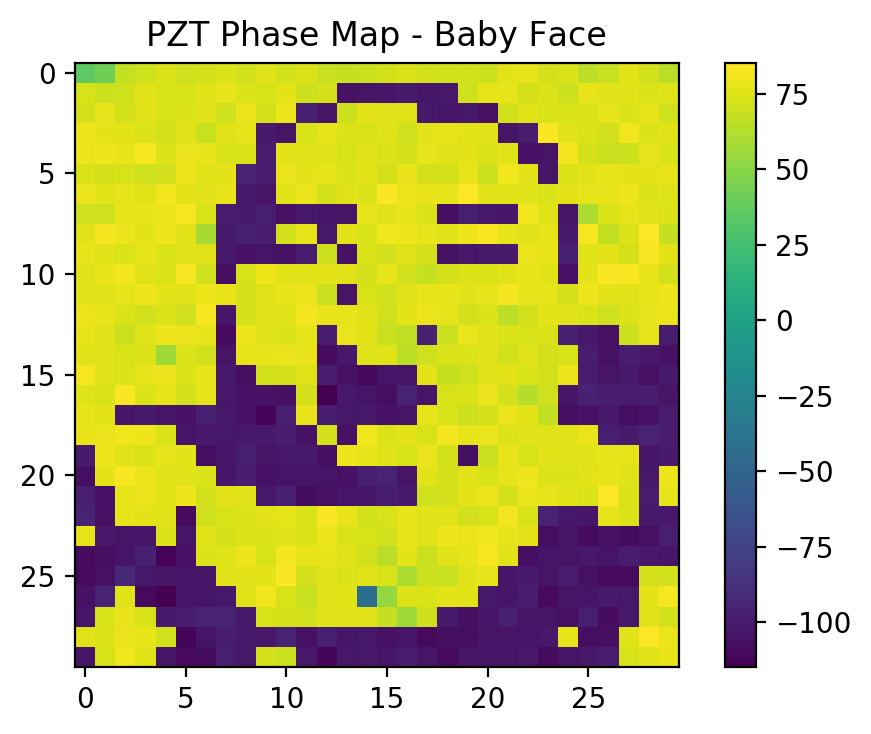

In [68]:
# Single Frequency Phase Recess Map
plt.figure(dpi=200)
plt.imshow(arr_mix)
plt.colorbar()
plt.title('PZT Phase Map - Baby Face')

In [ ]:
# View more python tutorials on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

# 14 - 3d
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
Tutorial reference:
http://www.python-course.eu/matplotlib_multiple_figures.php
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
"""
============= ================================================
        Argument      Description
        ============= ================================================
        *X*, *Y*, *Z* Data values as 2D arrays
        *rstride*     Array row stride (step size), defaults to 10
        *cstride*     Array column stride (step size), defaults to 10
        *color*       Color of the surface patches
        *cmap*        A colormap for the surface patches.
        *facecolors*  Face colors for the individual patches
        *norm*        An instance of Normalize to map values to colors
        *vmin*        Minimum value to map
        *vmax*        Maximum value to map
        *shade*       Whether to shade the facecolors
        ============= ================================================
"""

# I think this is different from plt12_contours
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
"""
==========  ================================================
        Argument    Description
        ==========  ================================================
        *X*, *Y*,   Data values as numpy.arrays
        *Z*
        *zdir*      The direction to use: x, y or z (default)
        *offset*    If specified plot a projection of the filled contour
                    on this position in plane normal to zdir
        ==========  ================================================
"""

ax.set_zlim(-2, 2)

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.sin(X)*np.sin(Y)

levels = np.linspace(-1, 1, 40)

ax.contourf(X, Y, .1*np.sin(3*X)*np.sin(5*Y), zdir='z', levels=.1*levels)
ax.contourf(X, Y, 3+.1*np.sin(5*X)*np.sin(8*Y), zdir='z', levels=3+.1*levels)
ax.contourf(X, Y, 7+.1*np.sin(7*X)*np.sin(3*Y), zdir='z', levels=7+.1*levels)

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 10)

plt.show()

In [ ]:
arr[0,:,0]